In [29]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt


def unshear(img):
    gray = img
    thresh = img.copy()
    trans = thresh.transpose()

    arr = []
    for i in range(thresh.shape[1]):
        arr.insert(0, trans[i].sum())

    arr = []
    for i in range(thresh.shape[0]):
        arr.insert(0, thresh[i].sum())

    y = thresh.shape[0] - 1 - np.nonzero(arr)[0][0]
    y_top = thresh.shape[0] - 1 - np.nonzero(arr)[0][-1]

    trans1 = thresh.transpose()
    sum1 = []
    for i in range(trans1.shape[0]):
        sum1.insert(i, trans1[i].sum())

    height = y - y_top
    max_value = 255 * height
    prev_num = len([i for i in sum1 if i >= (0.6 * max_value)])
    final_ang = 0
    for ang in range(-25, 25, 3):
        thresh = gray.copy()
        if ang > 0:
            for i in range(y):
                temp = thresh[i]
                move = int((y - i) * (math.tan(math.radians(ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][:temp.size - move] = temp[move:]
                thresh[i][temp.size - move:] = [0 for m in range(move)]
        else:
            # print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y - i) * (math.tan(math.radians(-ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][move:] = temp[:temp.size - move]
                thresh[i][:move] = [0 for m in range(move)]
        trans1 = thresh.transpose()
        sum1 = []
        for i in range(trans1.shape[0]):
            sum1.insert(i, trans1[i].sum())
        num = len([i for i in sum1 if i >= (0.60 * max_value)])
        if (num >= prev_num):
            prev_num = num
            final_ang = ang
    thresh = gray.copy()
    if final_ang > 0:
        for i in range(y):
            temp = thresh[i]
            move = int((y - i) * (math.tan(math.radians(final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][:temp.size - move] = temp[move:]
            thresh[i][temp.size - move:] = [0 for m in range(move)]
    else:
        for i in range(y):
            temp = thresh[i]
            move = int((y - i) * (math.tan(math.radians(-final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][move:] = temp[:temp.size - move]
            thresh[i][:move] = [0 for m in range(move)]
    return thresh


image = cv2.imread('./orand_car_2014/CAR-A/a_train_images/a_car_000605.png', cv2.IMREAD_GRAYSCALE)

_, thresh = cv2.threshold(image, 127, 255, 1)

thresh = unshear(thresh)
kernel = np.ones((2, 2), np.uint8)
thresh = cv2.erode(thresh, kernel, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations=1)


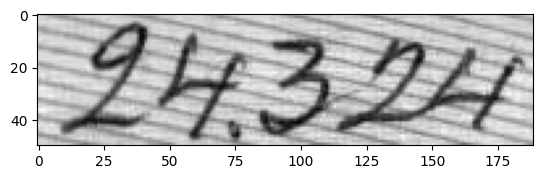

In [30]:
plt.imshow(image, cmap='gray')


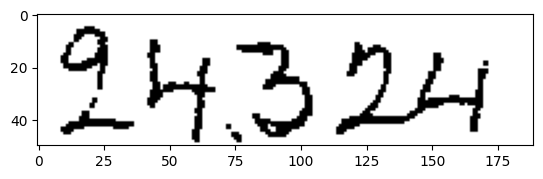

In [31]:
plt.imshow(255 - thresh, cmap='gray')

In [32]:
vertical_projection = thresh.sum(axis=0)

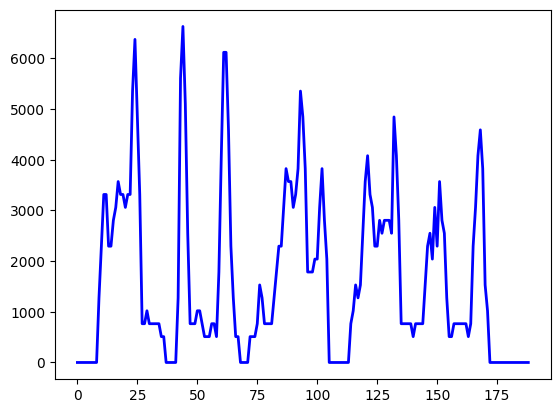

In [33]:
plt.plot(vertical_projection, color='b', linewidth=2)  # Set the line width to 2

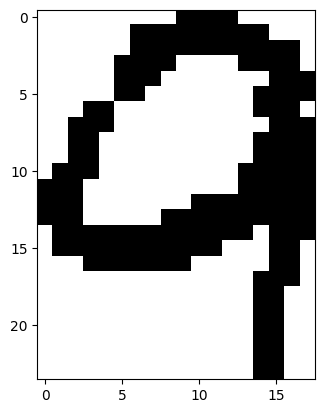

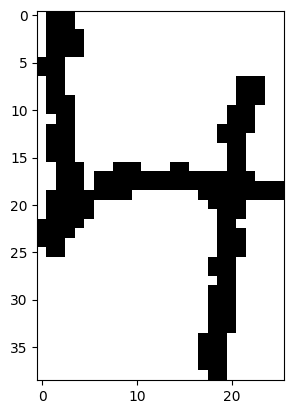

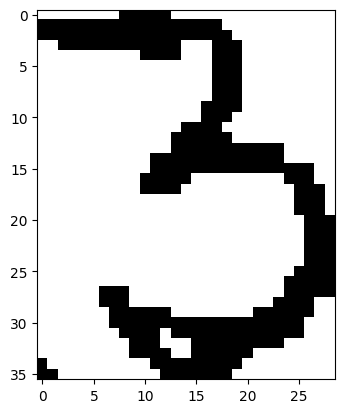

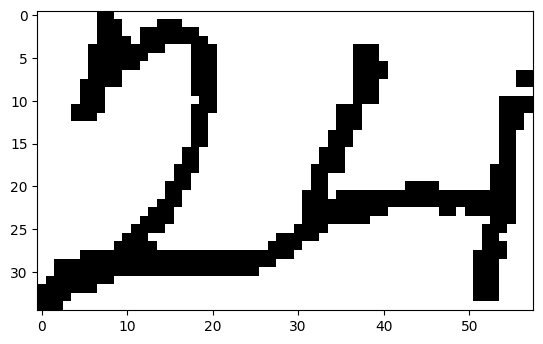

In [34]:
# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = [c for c in contours if cv2.contourArea(c) > 100]
sorted_contours = sorted(filtered_contours, key=lambda c: cv2.boundingRect(c)[0])
segments = []
for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        digit_region = thresh[y:y + h, x:x + w]
        segments.append(digit_region)
        plt.imshow(255 - digit_region, cmap='gray')
        plt.show()

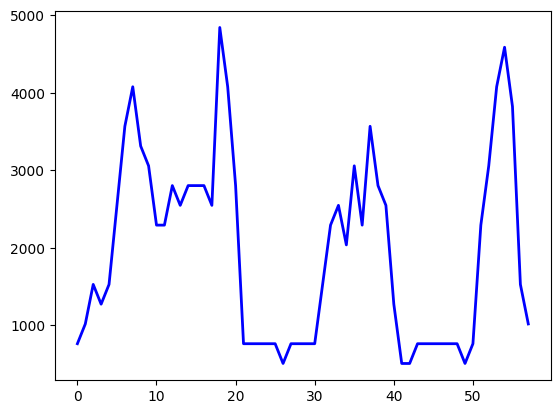

In [35]:
plt.plot(segments[-1].sum(axis=0), color='b', linewidth=2)  # Set the line width to 2
